# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df.drop(columns='Unnamed: 0', inplace=True)

## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
heroes_df.info()
heroes_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [5]:
powers_df.info()
powers_df.isna().any().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


0

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

* For the Heroes DataFrame there are two columns that needed to be cleaned. The first is Publisher. This columns is strings and categorical. There are 15 rows with missing values. I chose to replace the values in these rows with a new category to represent "None". There are many categories in this column and the number of 15 in our 'None' category will not effect the visualiations. 

* The second issue in the heroes Dataframe was Weight. This is an integer and represents the fictional weight of the character. There were 237 listed at -99. Of course, It's possible that superhero characters could have a negative weight (Does that mean they are magnetic or have their own reverse gravity?), however in this case I assumed it was a method to enter a value even though a true value wasn't available. There were too many with this listing to dismiss all the rows with that values. So I decided to replace the values. In this case I chose the median of the remaing values. Due to the negative values effecting the mean, the median created a safe number to use for further statistical analysis. 

* Just as above, a similar process was used for 'Height'

* The Powers Dataframe is too wide to be viewed with .info() method, but a search for NaN returns none and all values seem to be Boolean. Therefore, given the size of the columns and index it seems that this list is fairly accurate. However, the name of each character was listed as the first column. It may be useful to use this character name with the other DataFram as a primary key. Thus, I used the set_index() method to change the index of the dataFrame tothe charactername. 


In [6]:
heroes_df['Publisher'].describe()
heroes_df['Publisher'].value_counts()
heroes_df.isna().sum()
heroes_df['Weight'].sort_values(ascending=False).value_counts().head()
#heroes_df['Weight'].max()

-99.0    237
 79.0     23
 54.0     23
 81.0     22
 90.0     19
Name: Weight, dtype: int64

In [7]:
heroes_df['Weight'].sort_values(ascending=False).value_counts().head()
heroes_df['Weight'].max()
heroes_df['Weight'].mean()
heroes_df['Weight'].median()
heroes_df['Weight'].dtype

dtype('float64')

In [8]:
heroes_df['Publisher'].fillna(value='None', inplace=True)

In [9]:
heroes_df['Weight'].replace(to_replace=-99, value=(heroes_df['Weight'].median()), inplace=True)

In [10]:
heroes_df.dropna(inplace=True)

In [11]:
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [12]:
heroes_df['Height'].sort_values(ascending=False).value_counts().head()

-99.0     217
 183.0     59
 188.0     51
 178.0     39
 180.0     38
Name: Height, dtype: int64

In [13]:
heroes_df['Height'].replace(to_replace=-99, value=(heroes_df['Height'].median()), inplace=True)

In [14]:
heroes_df['name'].sort_values(ascending=False).value_counts().head()

Spider-Man    3
Goliath       3
Firestorm     2
Namor         2
Atom          2
Name: name, dtype: int64

In [15]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [16]:
powers_df.isna().any().sum()

0

In [17]:
powers_df.sum()

hero_names               3-D ManA-BombAbe SapienAbin SurAbominationAbra...
Agility                                                                242
Accelerated Healing                                                    178
Lantern Power Ring                                                      11
Dimensional Awareness                                                   25
Cold Resistance                                                         47
Durability                                                             257
Stealth                                                                126
Energy Absorption                                                       77
Flight                                                                 212
Danger Sense                                                            30
Underwater breathing                                                    21
Marksmanship                                                           119
Weapons Master           

In [18]:
powers_df.set_index('hero_names', inplace=True)

In [19]:
heroes_df.set_index('name', inplace=True)

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [20]:
heroes_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,Male,blue,Cosmic Entity,Black,175.0,Marvel Comics,-,bad,62.0


In [21]:
left_df = heroes_df.join(powers_df)

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [22]:
male_heroes_df = heroes_df[heroes_df.Gender == 'Male']

In [23]:
female_heroes_df = heroes_df[heroes_df.Gender == 'Female']

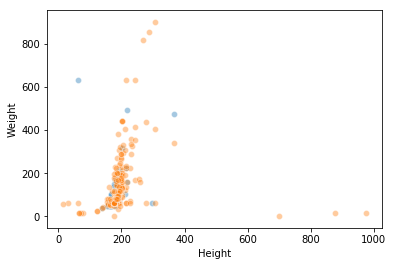

In [24]:
xf = female_heroes_df['Height']
yf = female_heroes_df['Weight']
xm = male_heroes_df['Height']
ym = male_heroes_df['Weight']

sns.scatterplot(x=(xf), y=(yf), alpha=.4)
sns.scatterplot(xm, ym, alpha=.4, legend='brief')                                                                                             
                                                                                             
                                                                                             

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [25]:
male_heroes_df = heroes_df[heroes_df.Gender == 'Male']
female_heroes_df = heroes_df[heroes_df.Gender == 'Female']

def show_distplot(dataframe, gender, column_name):
    return sns.distplot(dataframe[dataframe.Gender == gender][column_name], bins=None, hist=True, kde=False, 
                        rug=False, fit=None, hist_kws=None, 
                        kde_kws=None, rug_kws=None, fit_kws=None, 
                        color=None, vertical=False, norm_hist=True, 
                        axlabel=None, label=None, ax=None)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


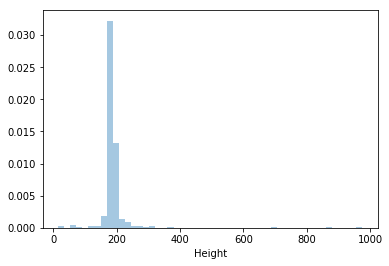

In [26]:
show_distplot(heroes_df, 'Male', 'Height')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


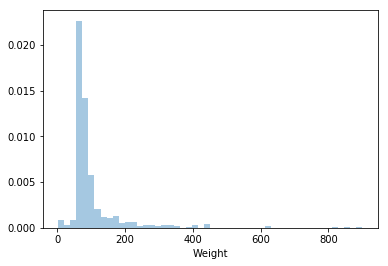

In [27]:
show_distplot(heroes_df, 'Male', 'Weight')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


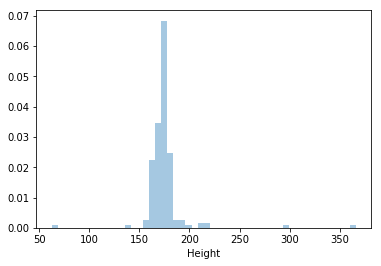

In [28]:
show_distplot(heroes_df, 'Female', 'Height')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


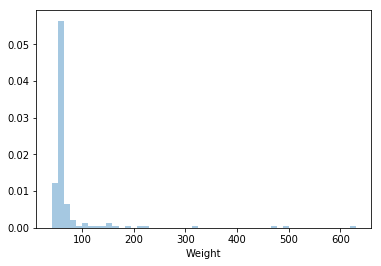

In [29]:
show_distplot(heroes_df, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [173]:
left_df.fillna('Unknown')[9:]

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0,False,...,False,False,False,False,False,False,False,False,False,False
Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0,False,...,False,False,False,False,False,False,False,False,False,False
Air-Walker,Male,blue,-,White,188.0,Marvel Comics,-,bad,108.0,False,...,False,False,False,False,False,False,False,False,False,False
Ajax,Male,brown,Cyborg,Black,193.0,Marvel Comics,-,bad,90.0,True,...,False,False,False,False,False,False,False,False,False,False
Alan Scott,Male,blue,-,Blond,180.0,DC Comics,-,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Alex Mercer,Male,-,Human,-,175.0,Wildstorm,-,bad,62.0,True,...,False,False,False,False,False,False,False,False,False,False
Alex Woolsly,Male,-,-,-,175.0,NBC - Heroes,-,good,62.0,False,...,False,False,False,False,False,False,False,False,False,False
Alfred Pennyworth,Male,blue,Human,Black,178.0,DC Comics,-,good,72.0,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
Alien,Male,-,Xenomorph XX121,No Hair,244.0,Dark Horse Comics,black,bad,169.0,True,...,False,False,False,False,False,False,False,False,False,False
Allan Quatermain,Male,-,-,-,175.0,Wildstorm,-,good,62.0,False,...,False,False,False,False,False,False,False,False,False,False


In [162]:
marvel_df = left_df[left_df['Publisher'] == 'Marvel Comics']

In [163]:
marvel_df

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,175.0,Marvel Comics,-,bad,62.0,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,False,...,False,False,False,False,False,False,False,False,False,False
Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0,False,...,False,False,False,False,False,False,False,False,False,False
Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0,False,...,False,False,False,False,False,False,False,False,False,False
Air-Walker,Male,blue,-,White,188.0,Marvel Comics,-,bad,108.0,False,...,False,False,False,False,False,False,False,False,False,False
Ajax,Male,brown,Cyborg,Black,193.0,Marvel Comics,-,bad,90.0,True,...,False,False,False,False,False,False,False,False,False,False
Ammo,Male,brown,Human,Black,188.0,Marvel Comics,-,bad,101.0,False,...,False,False,False,False,False,False,False,False,False,False


In [164]:
marvel_powers = marvel_df.columns[9:]

Pull out a list of the powers

In [165]:
marvel_powers = list(marvel_powers)

In [166]:
type(marvel_powers)

list

In [167]:
temp_df = pd.DataFrame()
for i in range(len(marvel_powers)):
    temp_df[marvel_powers[i]] = left_df[marvel_powers[i]].value_counts()
    
    

In [168]:
temp_df.iloc[1:, :]

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
True,242,181,11,25,49,260,131,76,212,33,...,16,14,2,10,1,1,1,1,2,2


In [169]:
result=temp_df.sort_values(by=1, ascending=False, axis=1).iloc[1:,:5]

In [170]:
result

,Super Strength,Stamina,Durability,Super Speed,Agility
True,360,292,260,250,242


In [186]:
powers_dc = left_df[left_df['Publisher']== 'DC Comics']

In [197]:
powers_dc

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0,False,...,False,False,False,False,False,False,False,False,False,False
Alan Scott,Male,blue,-,Blond,180.0,DC Comics,-,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Alfred Pennyworth,Male,blue,Human,Black,178.0,DC Comics,-,good,72.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amazo,Male,red,Android,-,257.0,DC Comics,-,bad,173.0,True,...,False,False,False,False,False,False,False,False,False,False
Animal Man,Male,blue,Human,Blond,183.0,DC Comics,-,good,83.0,False,...,False,False,False,False,False,False,False,False,False,False
Anti-Monitor,Male,yellow,God / Eternal,No Hair,61.0,DC Comics,-,bad,62.0,False,...,False,True,False,False,False,False,False,False,False,False
Aquababy,Male,blue,-,Blond,175.0,DC Comics,-,good,62.0,False,...,False,False,False,False,False,False,False,False,False,False
Aqualad,Male,blue,Atlantean,Black,178.0,DC Comics,-,good,106.0,False,...,False,False,False,False,False,False,False,False,False,False
Aquaman,Male,blue,Atlantean,Blond,185.0,DC Comics,-,good,146.0,True,...,False,False,False,False,False,False,False,False,False,False


In [202]:
powers_list = left_df[left_df['Publisher']== 'DC Comics'].columns[9:]

In [204]:
powers_list = list(powers_dc)

In [205]:
dc_df = pd.DataFrame()
for i in range(len(powers_list)):
    dc_df[powers_list[i]] = powers_dc[powers_list[i]].value_counts()

In [206]:
dc_df

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Male,153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Female,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-,1,43.0,71.0,41.0,NaN,NaN,193.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
dc_result= dc_df.sort_values(by=1, ascending=False, axis=1).iloc[1:,:5]

KeyError: 1

In [195]:
dc_result

,Super Strength,Stamina,Durability,Super Speed,Agility
True,360,292,260,250,242


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data